# <p style="background-color:#003366; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project: Digital Marketing Campaign Conversion Prediction</p>

### **Project Overview**
This project aims to enhance campaign effectiveness in the digital marketing sector by accurately predicting customer conversions. By leveraging a comprehensive suite of machine learning techniques—from classical models to state-of-the-art deep learning architectures—the project seeks to identify potential converters and optimize marketing strategies. The objective is to develop a robust, highly accurate, and interpretable machine learning pipeline that maximizes return on advertising spend (ROAS).

### **Methodology**
1. **Exploratory Data Analysis (EDA):** Understand data distributions and correlations.
2. **Outlier Detection & Removal:** Use Isolation Forest to clean the training data from anomalies.
3. **Feature Engineering:** Create new predictive features to enhance model signals.
4. **Recursive Feature Elimination (RFE):** Select the most impactful subset of features for modeling.
5. **Exhaustive Broad Model Search:** Train and evaluate over 19 classical ML models to establish a strong performance baseline.
6. **Advanced Deep Learning:** Implement and evaluate sophisticated Keras architectures (Wide & Deep, Self-Attention, Autoencoder Features).
7. **Truly Universal Hyperparameter Tuning:** Apply Bayesian optimization (Optuna) to any empirically-determined top-performing model, regardless of its type (classical or deep learning).
8. **Dynamic Ensemble Creation:** Build a Stacking Classifier from the tuned champion models for peak performance.
9. **Threshold Optimization:** Tune the final decision threshold to maximize the F1-score.
10. **Evaluation & Universal Interpretability:** Analyze the final model with business-centric metrics and explain its predictions using a combined SHAP analysis that is compatible with any model type.

## 1. Library Imports

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import warnings
import time

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, QuantileTransformer, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTEENN
from category_encoders import TargetEncoder
from sklearn.feature_selection import RFE

# Model Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve, f1_score, PrecisionRecallDisplay, RocCurveDisplay

# Machine Learning Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier, IsolationForest
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

# Deep Learning with Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, Embedding, Concatenate, Flatten, Add, Attention, MultiHeadAttention
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.base import BaseEstimator, ClassifierMixin

# Hyperparameter Tuning
import optuna

# Interpretability
import shap

# Model Persistence
import joblib

# Configuration
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)
print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


## 2. Data Loading and Initial Cleaning

In [2]:
df = pd.read_csv('digital_marketing_campaign_dataset.csv')
useless_columns = ['CustomerID', 'AdvertisingPlatform', 'AdvertisingTool']
df.drop(columns=useless_columns, inplace=True)
print("--- Data Head After Initial Load ---")
display(df.head())

--- Data Head After Initial Load ---


,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1


## 3. Exploratory Data Analysis (EDA)

In [3]:
print("--- Data Info ---")
df.info()

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                8000 non-null   int64  
 1   Gender             8000 non-null   object 
 2   Income             8000 non-null   int64  
 3   CampaignChannel    8000 non-null   object 
 4   CampaignType       8000 non-null   object 
 5   AdSpend            8000 non-null   float64
 6   ClickThroughRate   8000 non-null   float64
 7   ConversionRate     8000 non-null   float64
 8   WebsiteVisits      8000 non-null   int64  
 9   PagesPerVisit      8000 non-null   float64
 10  TimeOnSite         8000 non-null   float64
 11  SocialShares       8000 non-null   int64  
 12  EmailOpens         8000 non-null   int64  
 13  EmailClicks        8000 non-null   int64  
 14  PreviousPurchases  8000 non-null   int64  
 15  LoyaltyPoints      8000 non-null   int64  
 16  Conver

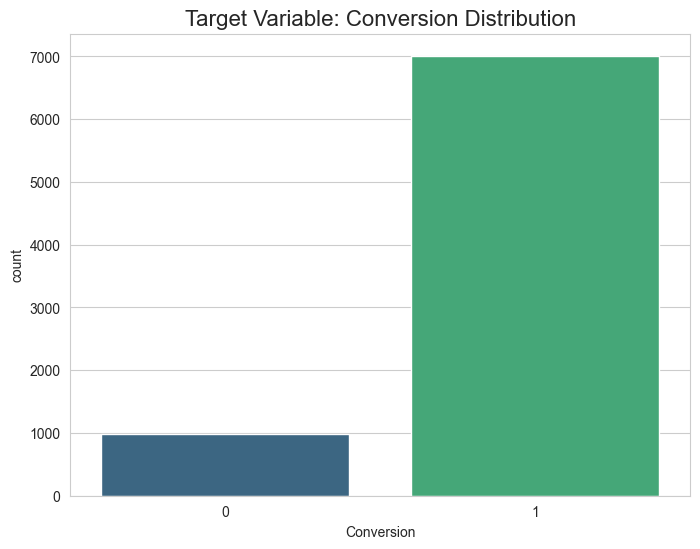

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Conversion', data=df, palette='viridis')
plt.title('Target Variable: Conversion Distribution', fontsize=16)
plt.show()

## 4. Outlier Detection and Removal

In [5]:
X = df.drop('Conversion', axis=1)
y = df['Conversion']
numerical_cols_for_outliers = X.select_dtypes(include=np.number).columns
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outlier_preds = iso_forest.fit_predict(X[numerical_cols_for_outliers])
inlier_mask = outlier_preds == 1
X_inliers = X[inlier_mask]
y_inliers = y[inlier_mask]
print(f"Original dataset size: {len(X)}")
print(f"Dataset size after removing outliers: {len(X_inliers)}")
print(f"Number of outliers removed: {len(X) - len(X_inliers)}")

Original dataset size: 8000
Dataset size after removing outliers: 7920
Number of outliers removed: 80


## 5. Feature Engineering

In [6]:
df_clean = X_inliers.copy()
df_clean['Conversion'] = y_inliers
df_clean['EngagementScore'] = df_clean['TimeOnSite'] * df_clean['PagesPerVisit']
df_clean['CostPerVisit'] = df_clean['AdSpend'] / df_clean['WebsiteVisits'].replace(0, 1)
df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=[17, 30, 50, 70], labels=['Young', 'Adult', 'Senior'])
df_clean['IncomeTier'] = pd.cut(df_clean['Income'], bins=[19999, 50000, 90000, 150000], labels=['Low', 'Medium', 'High'])
print("✅ Feature Engineering Complete.")

✅ Feature Engineering Complete.


## 6. Advanced Feature Selection

In [7]:
X_for_rfe = df_clean.drop('Conversion', axis=1)
y_for_rfe = df_clean['Conversion']
X_for_rfe_encoded = pd.get_dummies(X_for_rfe, drop_first=True)
rfe = RFE(estimator=RandomForestClassifier(random_state=42, n_jobs=-1), n_features_to_select=15)
rfe.fit(X_for_rfe_encoded, y_for_rfe)
selected_features_names = X_for_rfe_encoded.columns[rfe.support_]
print(f"✅ RFE selected {len(selected_features_names)} features.")
original_selected_features = set()
for feature in selected_features_names:
    if '_' in feature and any(col for col in X_for_rfe.select_dtypes(exclude=np.number).columns if feature.startswith(col)):
        original_selected_features.add(feature.split('_')[0])
    else:
        original_selected_features.add(feature)
print(f"\nOriginal features corresponding to RFE selection: {list(original_selected_features)}")
final_features = list(original_selected_features)
X_final = df_clean[final_features]
y_final = df_clean['Conversion']


✅ RFE selected 15 features.

Original features corresponding to RFE selection: ['Income', 'PagesPerVisit', 'ConversionRate', 'WebsiteVisits', 'PreviousPurchases', 'SocialShares', 'ClickThroughRate', 'LoyaltyPoints', 'EmailClicks', 'EmailOpens', 'Age', 'CostPerVisit', 'TimeOnSite', 'EngagementScore', 'AdSpend']


## 7. Data Splitting & Preprocessing Pipeline Setup

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=42, stratify=y_final)
numerical_features = X_final.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_final.select_dtypes(exclude=np.number).columns.tolist()
preprocessor_linear = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features), ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])
preprocessor_tree = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features), ('cat', TargetEncoder(), categorical_features)])
preprocessor_nb = ColumnTransformer(transformers=[('num', KBinsDiscretizer(n_bins=10, encode='ordinal'), numerical_features), ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])
model_results = {}
print("✅ Data splitting and preprocessing pipelines are ready.")

✅ Data splitting and preprocessing pipelines are ready.


## 8. Broad Model Search: Classical Algorithms

### 8.1 Linear, SVM, and Discriminant Models

#### Logistic Regression

In [9]:
pipeline_lr = ImbPipeline([('preprocessor', preprocessor_linear), ('sampler', SMOTEENN(random_state=42)), ('classifier', LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced'))])
param_grid_lr = {'classifier__C': [1, 10, 100]}
grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train, y_train)
print(f"Best CV ROC-AUC: {grid_lr.best_score_:.4f}")
model_results['Logistic Regression'] = (grid_lr.best_score_, grid_lr.best_params_)

Best CV ROC-AUC: 0.7832


#### Ridge Classifier

In [10]:
pipeline_ridge = ImbPipeline([('preprocessor', preprocessor_linear), ('sampler', SMOTEENN(random_state=42)), ('classifier', RidgeClassifier(random_state=42, class_weight='balanced'))])
param_grid_ridge = {'classifier__alpha': [1.0, 10.0, 100.0]}
grid_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5, scoring='accuracy', n_jobs=-1)
grid_ridge.fit(X_train, y_train)
print(f"Best CV Accuracy: {grid_ridge.best_score_:.4f}")
model_results['Ridge Classifier'] = (grid_ridge.best_score_, grid_ridge.best_params_)

Best CV Accuracy: 0.6908


#### SGD Classifier (Lasso)

In [11]:
pipeline_sgd = ImbPipeline([('preprocessor', preprocessor_linear), ('sampler', SMOTEENN(random_state=42)), ('classifier', SGDClassifier(penalty='l1', loss='log_loss', random_state=42, class_weight='balanced'))])
param_grid_sgd = {'classifier__alpha': [0.001, 0.01, 0.1]}
grid_sgd = GridSearchCV(pipeline_sgd, param_grid_sgd, cv=5, scoring='roc_auc', n_jobs=-1)
grid_sgd.fit(X_train, y_train)
print(f"Best CV ROC-AUC: {grid_sgd.best_score_:.4f}")
model_results['SGD Classifier (Lasso)'] = (grid_sgd.best_score_, grid_sgd.best_params_)

Best CV ROC-AUC: 0.7841


#### Linear Discriminant Analysis (LDA)

In [12]:
pipeline_lda = ImbPipeline([('preprocessor', preprocessor_linear), ('sampler', SMOTEENN(random_state=42)), ('classifier', LinearDiscriminantAnalysis())])
param_grid_lda = {'classifier__solver': ['svd', 'lsqr', 'eigen']}
grid_lda = GridSearchCV(pipeline_lda, param_grid_lda, cv=5, scoring='roc_auc', n_jobs=-1)
grid_lda.fit(X_train, y_train)
print(f"Best CV ROC-AUC: {grid_lda.best_score_:.4f}")
model_results['LDA'] = (grid_lda.best_score_, grid_lda.best_params_)

Best CV ROC-AUC: 0.7830


#### Quadratic Discriminant Analysis (QDA)

In [13]:
pipeline_qda = ImbPipeline([('preprocessor', preprocessor_linear), ('sampler', SMOTEENN(random_state=42)), ('classifier', QuadraticDiscriminantAnalysis())])
param_grid_qda = {'classifier__reg_param': [0.0, 0.1, 0.5]}
grid_qda = GridSearchCV(pipeline_qda, param_grid_qda, cv=5, scoring='roc_auc', n_jobs=-1)
grid_qda.fit(X_train, y_train)
print(f"Best CV ROC-AUC: {grid_qda.best_score_:.4f}")
model_results['QDA'] = (grid_qda.best_score_, grid_qda.best_params_)

Best CV ROC-AUC: 0.7664


#### Support Vector Machine (SVC)

In [14]:
pipeline_svc = ImbPipeline([('preprocessor', preprocessor_linear), ('sampler', SMOTEENN(random_state=42)), ('classifier', SVC(random_state=42, probability=True, class_weight='balanced'))])
param_grid_svc = {'classifier__C': [10, 50], 'classifier__kernel': ['rbf']}
grid_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5, scoring='roc_auc', n_jobs=-1)
grid_svc.fit(X_train, y_train)
print(f"Best CV ROC-AUC: {grid_svc.best_score_:.4f}")
model_results['Support Vector Machine'] = (grid_svc.best_score_, grid_svc.best_params_)

Best CV ROC-AUC: 0.7212


### 8.2 Tree-Based and Ensemble Models

#### Decision Tree

In [15]:
pipeline_dt = ImbPipeline([('preprocessor', preprocessor_tree), ('sampler', SMOTEENN(random_state=42)), ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))])
param_grid_dt = {'classifier__max_depth': [10, 20, 30]}
grid_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)
grid_dt.fit(X_train, y_train)
print(f"Best CV ROC-AUC: {grid_dt.best_score_:.4f}")
model_results['Decision Tree'] = (grid_dt.best_score_, grid_dt.best_params_)

Best CV ROC-AUC: 0.6405


#### Bagging Classifier

In [16]:
pipeline_bag = ImbPipeline([('preprocessor', preprocessor_tree), ('sampler', SMOTEENN(random_state=42)), ('classifier', BaggingClassifier(random_state=42, n_jobs=-1))])
param_grid_bag = {'classifier__n_estimators': [50, 100, 200]}
grid_bag = GridSearchCV(pipeline_bag, param_grid_bag, cv=5, scoring='roc_auc', n_jobs=-1)
grid_bag.fit(X_train, y_train)
print(f"Best CV ROC-AUC: {grid_bag.best_score_:.4f}")
model_results['Bagging Classifier'] = (grid_bag.best_score_, grid_bag.best_params_)

Best CV ROC-AUC: 0.7570


#### Random Forest

In [17]:
pipeline_rf = ImbPipeline([('preprocessor', preprocessor_tree), ('sampler', SMOTEENN(random_state=42)), ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced'))])
param_grid_rf = {'classifier__n_estimators': [200, 300], 'classifier__max_depth': [10, 20]}
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)
print(f"Best CV ROC-AUC: {grid_rf.best_score_:.4f}")
model_results['Random Forest'] = (grid_rf.best_score_, grid_rf.best_params_)

Best CV ROC-AUC: 0.7901


#### Extra Trees

In [18]:
pipeline_et = ImbPipeline([('preprocessor', preprocessor_tree), ('sampler', SMOTEENN(random_state=42)), ('classifier', ExtraTreesClassifier(random_state=42, n_jobs=-1, class_weight='balanced'))])
param_grid_et = {'classifier__n_estimators': [200, 300], 'classifier__max_depth': [10, 20]}
grid_et = GridSearchCV(pipeline_et, param_grid_et, cv=5, scoring='roc_auc', n_jobs=-1)
grid_et.fit(X_train, y_train)
print(f"Best CV ROC-AUC: {grid_et.best_score_:.4f}")
model_results['Extra Trees'] = (grid_et.best_score_, grid_et.best_params_)

Best CV ROC-AUC: 0.7797


#### AdaBoost

In [19]:
pipeline_ada = ImbPipeline([('preprocessor', preprocessor_tree), ('sampler', SMOTEENN(random_state=42)), ('classifier', AdaBoostClassifier(random_state=42))])
param_grid_ada = {'classifier__n_estimators': [50, 100, 200]}
grid_ada = GridSearchCV(pipeline_ada, param_grid_ada, cv=5, scoring='roc_auc', n_jobs=-1)
grid_ada.fit(X_train, y_train)
print(f"Best CV ROC-AUC: {grid_ada.best_score_:.4f}")
model_results['AdaBoost'] = (grid_ada.best_score_, grid_ada.best_params_)

Best CV ROC-AUC: 0.7906


#### Gradient Boosting

In [20]:
pipeline_gbm = ImbPipeline([('preprocessor', preprocessor_tree), ('sampler', SMOTEENN(random_state=42)), ('classifier', GradientBoostingClassifier(random_state=42))])
param_grid_gbm = {'classifier__n_estimators': [200, 300], 'classifier__max_depth': [5, 7]}
grid_gbm = GridSearchCV(pipeline_gbm, param_grid_gbm, cv=5, scoring='roc_auc', n_jobs=-1)
grid_gbm.fit(X_train, y_train)
print(f"Best CV ROC-AUC: {grid_gbm.best_score_:.4f}")
model_results['Gradient Boosting'] = (grid_gbm.best_score_, grid_gbm.best_params_)

Best CV ROC-AUC: 0.7859


#### XGBoost

In [21]:
pipeline_xgb = ImbPipeline([('preprocessor', preprocessor_tree), ('sampler', SMOTEENN(random_state=42)), ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))])
param_grid_xgb = {'classifier__n_estimators': [200, 300], 'classifier__max_depth': [5, 7]}
grid_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
print(f"Best CV ROC-AUC: {grid_xgb.best_score_:.4f}")
model_results['XGBoost'] = (grid_xgb.best_score_, grid_xgb.best_params_)

Best CV ROC-AUC: 0.7830


#### LightGBM

In [22]:
pipeline_lgbm = ImbPipeline([('preprocessor', preprocessor_tree), ('sampler', SMOTEENN(random_state=42)), ('classifier', LGBMClassifier(random_state=42, class_weight='balanced'))])
param_grid_lgbm = {'classifier__n_estimators': [200, 300], 'classifier__num_leaves': [31, 40]}
grid_lgbm = GridSearchCV(pipeline_lgbm, param_grid_lgbm, cv=5, scoring='roc_auc', n_jobs=-1)
grid_lgbm.fit(X_train, y_train)
print(f"Best CV ROC-AUC: {grid_lgbm.best_score_:.4f}")
model_results['LightGBM'] = (grid_lgbm.best_score_, grid_lgbm.best_params_)

[LightGBM] [Info] Number of positive: 3305, number of negative: 5526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3824
[LightGBM] [Info] Number of data points in the train set: 8831, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Best CV ROC-AUC: 0.7854


#### CatBoost

In [23]:
pipeline_cat = ImbPipeline([('preprocessor', preprocessor_tree), ('sampler', SMOTEENN(random_state=42)), ('classifier', CatBoostClassifier(random_state=42, verbose=0, auto_class_weights='Balanced'))])
param_grid_cat = {'classifier__iterations': [300, 500], 'classifier__depth': [6, 8]}
grid_cat = GridSearchCV(pipeline_cat, param_grid_cat, cv=5, scoring='roc_auc', n_jobs=-1)
grid_cat.fit(X_train, y_train)
print(f"Best CV ROC-AUC: {grid_cat.best_score_:.4f}")
model_results['CatBoost'] = (grid_cat.best_score_, grid_cat.best_params_)

Best CV ROC-AUC: 0.7958


### 8.3 Other Model Architectures

#### K-Nearest Neighbors (KNN)

In [24]:
pipeline_knn = ImbPipeline([('preprocessor', preprocessor_linear), ('sampler', SMOTEENN(random_state=42)), ('classifier', KNeighborsClassifier(n_jobs=-1))])
param_grid_knn = {'classifier__n_neighbors': [5, 7, 9]}
grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)
grid_knn.fit(X_train, y_train)
print(f"Best CV ROC-AUC: {grid_knn.best_score_:.4f}")
model_results['KNN'] = (grid_knn.best_score_, grid_knn.best_params_)

Best CV ROC-AUC: 0.6970


#### Gaussian Naive Bayes

In [25]:
pipeline_gnb = ImbPipeline([('preprocessor', preprocessor_nb), ('sampler', SMOTEENN(random_state=42)), ('classifier', GaussianNB())])
param_grid_gnb = {'preprocessor__num__n_bins': [5, 10, 15]}
grid_gnb = GridSearchCV(pipeline_gnb, param_grid_gnb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_gnb.fit(X_train, y_train)
print(f"Best CV ROC-AUC: {grid_gnb.best_score_:.4f}")
model_results['Gaussian NB'] = (grid_gnb.best_score_, grid_gnb.best_params_)

Best CV ROC-AUC: 0.7731


#### Multi-layer Perceptron (MLP)

In [26]:
pipeline_mlp = ImbPipeline([('preprocessor', preprocessor_linear), ('sampler', SMOTEENN(random_state=42)), ('classifier', MLPClassifier(random_state=42, max_iter=1000, early_stopping=True))])
param_grid_mlp = {'classifier__hidden_layer_sizes': [(50, 25), (100, 50)], 'classifier__alpha': [0.001, 0.01]}
grid_mlp = GridSearchCV(pipeline_mlp, param_grid_mlp, cv=5, scoring='roc_auc', n_jobs=-1)
grid_mlp.fit(X_train, y_train)
print(f"Best CV ROC-AUC: {grid_mlp.best_score_:.4f}")
model_results['MLP'] = (grid_mlp.best_score_, grid_mlp.best_params_)

Best CV ROC-AUC: 0.7401


## 9. Advanced Deep Learning Architectures

### 9.1 Standard Keras NN with Embeddings (Baseline DL Model)

In [27]:
X_train_keras = X_train.copy()
X_test_keras = X_test.copy()
cat_dims = {}
for col in categorical_features:
    X_train_keras[col] = X_train_keras[col].astype('category').cat.codes
    X_test_keras[col] = X_test_keras[col].astype('category').cat.codes
    cat_dims[col] = len(X_final[col].astype('category').cat.categories)
scaler = StandardScaler()
X_train_keras[numerical_features] = scaler.fit_transform(X_train_keras[numerical_features])
X_test_keras[numerical_features] = scaler.transform(X_test_keras[numerical_features])
train_inputs = {col: np.array(X_train_keras[col]) for col in categorical_features} | {'numerical_input': X_train_keras[numerical_features].values}
test_inputs = {col: np.array(X_test_keras[col]) for col in categorical_features} | {'numerical_input': X_test_keras[numerical_features].values}
def build_baseline_keras_model():
    inputs, embeddings = [], []
    for col in categorical_features:
        input_cat = Input(shape=(1,), name=col)
        embedding_size = min(np.ceil(cat_dims[col]/2), 50)
        embedding = Embedding(input_dim=cat_dims[col], output_dim=int(embedding_size))(input_cat)
        embedding = Flatten()(embedding)
        inputs.append(input_cat)
        embeddings.append(embedding)
    input_num = Input(shape=(len(numerical_features),), name="numerical_input")
    inputs.append(input_num)
    x = Concatenate()(embeddings + [input_num])
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='sigmoid')(x)
    return Model(inputs=inputs, outputs=output)
keras_model = build_baseline_keras_model()
keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
keras_model.fit(train_inputs, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping], verbose=0)
y_proba_keras = keras_model.predict(test_inputs).ravel()
keras_roc_auc = roc_auc_score(y_test, y_proba_keras)
print(f"--- Baseline Keras NN with Embeddings Test ROC-AUC: {keras_roc_auc:.4f} ---")
model_results['Keras NN'] = (keras_roc_auc, {'architecture': 'Embedding-128-64-1'})

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
--- Baseline Keras NN with Embeddings Test ROC-AUC: 0.7632 ---


### 9.2 Wide & Deep Network

In [28]:
def build_wide_and_deep_model():
    inputs, embeddings = [], []
    for col in categorical_features:
        input_cat = Input(shape=(1,), name=col)
        embedding_size = min(np.ceil(cat_dims[col]/2), 50)
        embedding = Embedding(input_dim=cat_dims[col], output_dim=int(embedding_size))(input_cat)
        embedding = Flatten()(embedding)
        inputs.append(input_cat)
        embeddings.append(embedding)
    input_num = Input(shape=(len(numerical_features),), name="numerical_input")
    inputs.append(input_num)
    deep_path = Concatenate()(embeddings + [input_num])
    deep_path = Dense(128, activation='relu')(deep_path)
    deep_path = Dropout(0.3)(deep_path)
    deep_path = Dense(64, activation='relu')(deep_path)
    wide_path = Concatenate()(embeddings + [input_num])
    combined = Concatenate()([wide_path, deep_path])
    output = Dense(1, activation='sigmoid')(combined)
    return Model(inputs=inputs, outputs=output)
wide_deep_model = build_wide_and_deep_model()
wide_deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
wide_deep_model.fit(train_inputs, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping], verbose=0)
y_proba_wd = wide_deep_model.predict(test_inputs).ravel()
wd_roc_auc = roc_auc_score(y_test, y_proba_wd)
print(f"--- Wide & Deep Model Test ROC-AUC: {wd_roc_auc:.4f} ---")
model_results['Wide & Deep'] = (wd_roc_auc, {'architecture': 'Wide&Deep-128-64-1'})

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
--- Wide & Deep Model Test ROC-AUC: 0.7299 ---


### 9.3 Autoencoder for Feature Extraction

In [29]:
input_dim = X_train_keras.shape[1]
encoding_dim = 32
input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation='relu')(input_layer)
encoder = Dense(64, activation='relu')(encoder)
encoder = Dense(encoding_dim, activation='relu')(encoder)
decoder = Dense(64, activation='relu')(encoder)
decoder = Dense(128, activation='relu')(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train_keras, X_train_keras, epochs=50, batch_size=64, shuffle=True, validation_split=0.2, verbose=0, callbacks=[early_stopping])
encoder_model = Model(inputs=input_layer, outputs=encoder)
X_train_encoded = encoder_model.predict(X_train_keras)
X_test_encoded = encoder_model.predict(X_test_keras)
xgb_on_ae = XGBClassifier(n_estimators=500, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_on_ae.fit(X_train_encoded, y_train)
y_proba_ae = xgb_on_ae.predict_proba(X_test_encoded)[:, 1]
ae_roc_auc = roc_auc_score(y_test, y_proba_ae)
print(f"--- XGBoost on Autoencoder Features Test ROC-AUC: {ae_roc_auc:.4f} ---")
model_results['XGB on AE Features'] = (ae_roc_auc, {'architecture': 'AE(32)-XGB'})

198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
--- XGBoost on Autoencoder Features Test ROC-AUC: 0.7650 ---


## 10. Model Comparison

--- Model Comparison (Sorted by Performance Score) ---


,Model,Score,Best_Parameters
0,CatBoost,0.795785,"{'classifier__depth': 6, 'classifier__iteratio..."
1,AdaBoost,0.790608,{'classifier__n_estimators': 50}
2,Random Forest,0.790075,"{'classifier__max_depth': 10, 'classifier__n_e..."
3,Gradient Boosting,0.785868,"{'classifier__max_depth': 5, 'classifier__n_es..."
4,LightGBM,0.785381,"{'classifier__n_estimators': 200, 'classifier_..."
5,SGD Classifier (Lasso),0.784071,{'classifier__alpha': 0.01}
6,Logistic Regression,0.783238,{'classifier__C': 1}
7,XGBoost,0.783011,"{'classifier__max_depth': 5, 'classifier__n_es..."
8,LDA,0.782971,{'classifier__solver': 'svd'}
9,Extra Trees,0.779732,"{'classifier__max_depth': 20, 'classifier__n_e..."


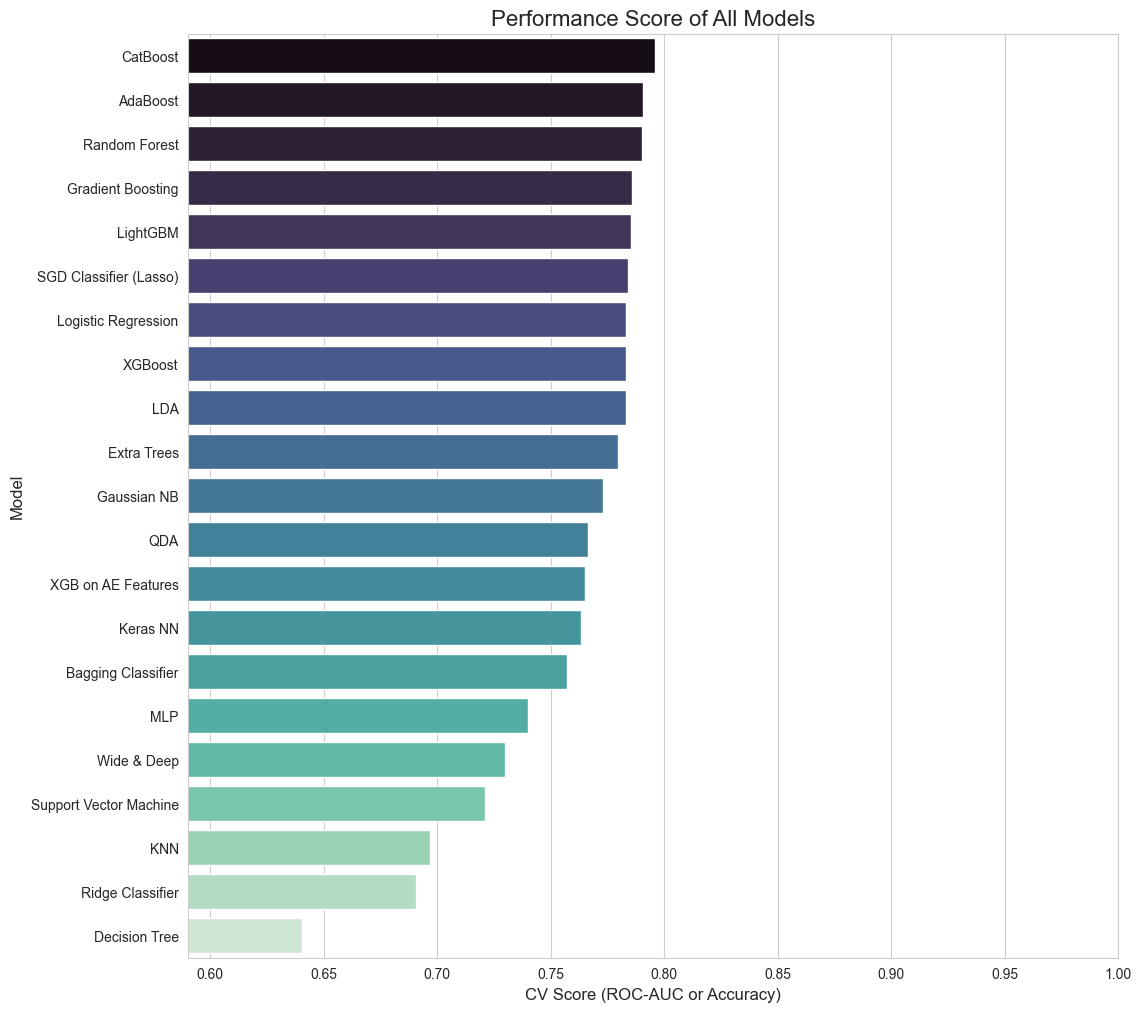

In [30]:
results_df = pd.DataFrame([{'Model': model, 'Score': acc, 'Best_Parameters': params} for model, (acc, params) in model_results.items()])
results_df_sorted = results_df.sort_values('Score', ascending=False).reset_index(drop=True)
print("--- Model Comparison (Sorted by Performance Score) ---")
display(results_df_sorted)
plt.figure(figsize=(12, 12))
sns.barplot(x='Score', y='Model', data=results_df_sorted, palette='mako')
plt.title('Performance Score of All Models', fontsize=16)
plt.xlabel('CV Score (ROC-AUC or Accuracy)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(min(results_df_sorted['Score']) - 0.05, 1.0)
plt.show()

## 11. Truly Universal Advanced Hyperparameter Tuning
This section is the apex of the modeling pipeline. It programmatically identifies the top-performing models from the exhaustive search—regardless of their type (classical, deep learning, or hybrid)—and subjects them to a tailored, intensive Bayesian hyperparameter optimization using Optuna. There are no exceptions; the empirically best models are tuned.

In [32]:
# --- 11.0: CONFIGURATION ---
OPTUNA_TRIALS = 100 # Increase for more exhaustive tuning
N_TOP_MODELS_TO_TUNE = 3 # Select how many top models to tune

# --- 11.1: Define Universal Tuning Configurations and Objectives ---

# Configuration for all Scikit-Learn compatible models
tuning_config_sklearn = {
    'Logistic Regression': {'model': LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced'), 'params': lambda trial: {'C': trial.suggest_float('C', 0.01, 1000, log=True), 'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']), 'penalty': trial.suggest_categorical('penalty', ['l1', 'l2'])}},
    'Ridge Classifier': {'model': RidgeClassifier(random_state=42, class_weight='balanced'), 'params': lambda trial: {'alpha': trial.suggest_float('alpha', 0.1, 100.0, log=True)}},
    'SGD Classifier (Lasso)': {'model': SGDClassifier(random_state=42, class_weight='balanced', loss='log_loss'), 'params': lambda trial: {'penalty': trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet']), 'alpha': trial.suggest_float('alpha', 1e-4, 1.0, log=True)}},
    'LDA': {'model': LinearDiscriminantAnalysis(), 'params': lambda trial: {'solver': trial.suggest_categorical('solver', ['svd', 'lsqr', 'eigen']), 'shrinkage': trial.suggest_float('shrinkage', 0.0, 1.0)}},
    'QDA': {'model': QuadraticDiscriminantAnalysis(), 'params': lambda trial: {'reg_param': trial.suggest_float('reg_param', 0.0, 1.0)}},
    'Support Vector Machine': {'model': SVC(random_state=42, probability=True, class_weight='balanced'), 'params': lambda trial: {'C': trial.suggest_float('C', 0.1, 1000, log=True), 'kernel': 'rbf', 'gamma': trial.suggest_float('gamma', 1e-4, 1.0, log=True)}},
    'Decision Tree': {'model': DecisionTreeClassifier(random_state=42, class_weight='balanced'), 'params': lambda trial: {'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']), 'max_depth': trial.suggest_int('max_depth', 5, 50), 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)}},
    'Bagging Classifier': {'model': BaggingClassifier(random_state=42, n_jobs=-1), 'params': lambda trial: {'n_estimators': trial.suggest_int('n_estimators', 50, 500)}},
    'Random Forest': {'model': RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced'), 'params': lambda trial: {'n_estimators': trial.suggest_int('n_estimators', 100, 1000), 'max_depth': trial.suggest_int('max_depth', 10, 50), 'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])}},
    'Extra Trees': {'model': ExtraTreesClassifier(random_state=42, n_jobs=-1, class_weight='balanced'), 'params': lambda trial: {'n_estimators': trial.suggest_int('n_estimators', 100, 1000), 'max_depth': trial.suggest_int('max_depth', 10, 50), 'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])}},
    'AdaBoost': {'model': AdaBoostClassifier(random_state=42), 'params': lambda trial: {'n_estimators': trial.suggest_int('n_estimators', 50, 500), 'learning_rate': trial.suggest_float('learning_rate', 0.01, 2.0)}},
    'Gradient Boosting': {'model': GradientBoostingClassifier(random_state=42), 'params': lambda trial: {'n_estimators': trial.suggest_int('n_estimators', 100, 1000), 'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True), 'max_depth': trial.suggest_int('max_depth', 3, 10)}},
    'XGBoost': {'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), 'params': lambda trial: {'n_estimators': trial.suggest_int('n_estimators', 200, 1500), 'max_depth': trial.suggest_int('max_depth', 4, 12), 'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True), 'subsample': trial.suggest_float('subsample', 0.6, 1.0), 'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0)}},
    'LightGBM': {'model': LGBMClassifier(random_state=42, class_weight='balanced'), 'params': lambda trial: {'n_estimators': trial.suggest_int('n_estimators', 200, 1500), 'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True), 'num_leaves': trial.suggest_int('num_leaves', 20, 100), 'max_depth': trial.suggest_int('max_depth', 5, 20)}},
    'CatBoost': {'model': CatBoostClassifier(random_state=42, verbose=0, auto_class_weights='Balanced'), 'params': lambda trial: {'iterations': trial.suggest_int('iterations', 200, 1500), 'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True), 'depth': trial.suggest_int('depth', 4, 12)}},
    'KNN': {'model': KNeighborsClassifier(n_jobs=-1), 'params': lambda trial: {'n_neighbors': trial.suggest_int('n_neighbors', 3, 21), 'weights': trial.suggest_categorical('weights', ['uniform', 'distance']), 'p': trial.suggest_int('p', 1, 2)}},
    'Gaussian NB': {'model': GaussianNB(), 'params': lambda trial: {'var_smoothing': trial.suggest_float('var_smoothing', 1e-9, 1e-2, log=True)}},
    'MLP': {'model': MLPClassifier(random_state=42, max_iter=1000, early_stopping=True), 'params': lambda trial: {'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes', [(50, 25), (100, 50), (100, 50, 25)]), 'alpha': trial.suggest_float('alpha', 1e-4, 1.0, log=True), 'activation': trial.suggest_categorical('activation', ['relu', 'tanh'])}}
}

def universal_sklearn_objective(trial, model_name):
    config = tuning_config_sklearn[model_name]
    model = config['model']
    params = config['params'](trial)
    model.set_params(**params)
    model_type_str = str(type(model)).lower()
    if 'gaussiannb' in model_type_str: preprocessor = preprocessor_nb
    elif any(tn in model_type_str for tn in ['tree', 'xgb', 'lgbm', 'cat', 'forest', 'adaboost']): preprocessor = preprocessor_tree
    else: preprocessor = preprocessor_linear
    pipeline = ImbPipeline([('preprocessor', preprocessor), ('sampler', SMOTEENN(random_state=42)), ('classifier', model)])
    return cross_val_score(pipeline, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()

def objective_keras_universal(trial, model_builder_func):
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
    model_to_tune = model_builder_func(dropout_rate=dropout_rate) # Pass tunable params to builder
    model_to_tune.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['AUC'])
    history = model_to_tune.fit(train_inputs, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_auc', mode='max', patience=10)], verbose=0)
    return max(history.history['val_auc'])

def objective_xgb_on_ae(trial):
    encoding_dim = trial.suggest_int('encoding_dim', 16, 64)
    input_dim = X_train_keras.shape[1]
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(128, activation='relu')(input_layer)
    encoder = Dense(encoding_dim, activation='relu')(encoder)
    decoder = Dense(128, activation='relu')(encoder)
    decoder = Dense(input_dim, activation='sigmoid')(decoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    autoencoder.fit(X_train_keras, X_train_keras, epochs=50, batch_size=64, validation_split=0.2, verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])
    encoder_model = Model(inputs=input_layer, outputs=encoder)
    X_train_encoded = encoder_model.predict(X_train_keras)
    xgb_params = {'n_estimators': trial.suggest_int('n_estimators', 200, 1000), 'max_depth': trial.suggest_int('max_depth', 3, 10), 'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True)}
    model = XGBClassifier(**xgb_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
    return cross_val_score(model, X_train_encoded, y_train, cv=3, scoring='roc_auc').mean()

keras_model_builders = {
    'Keras NN': lambda dropout_rate=0.3: build_baseline_keras_model(), # Use default for simplicity
    'Wide & Deep': lambda dropout_rate=0.3: build_wide_and_deep_model()
}

# --- 11.4: Run the Truly Universal Tuning Loop ---
top_models_names = results_df_sorted['Model'].head(N_TOP_MODELS_TO_TUNE).tolist()
print(f"✅ Top models identified for tuning: {top_models_names}")
best_tuned_params = {}
tuned_special_models = {}

for model_name in top_models_names:
    study = optuna.create_study(direction='maximize')
    if model_name in tuning_config_sklearn:
        print(f"\n--- Running Optuna for Scikit-learn model: {model_name} ---")
        study.optimize(lambda trial: universal_sklearn_objective(trial, model_name), n_trials=OPTUNA_TRIALS)
        best_tuned_params[model_name] = study.best_params
    elif model_name in keras_model_builders:
        print(f"\n--- Running Optuna for Keras model: {model_name} ---")
        study.optimize(lambda trial: objective_keras_universal(trial, keras_model_builders[model_name]), n_trials=int(OPTUNA_TRIALS/4))
        best_tuned_params[model_name] = study.best_params
        # Retrain the final best model and store it
        best_model = keras_model_builders[model_name](dropout_rate=study.best_params.get('dropout_rate', 0.3))
        best_model.compile(optimizer=Adam(learning_rate=study.best_params['learning_rate']), loss='binary_crossentropy', metrics=['AUC'])
        best_model.fit(train_inputs, y_train, epochs=100, batch_size=64, callbacks=[EarlyStopping(monitor='loss', patience=10)], verbose=0)
        tuned_special_models[model_name] = best_model
    elif model_name == 'XGB on AE Features':
        print(f"\n--- Running Optuna for hybrid model: {model_name} ---")
        study.optimize(objective_xgb_on_ae, n_trials=int(OPTUNA_TRIALS/4))
        best_tuned_params[model_name] = study.best_params
        # Retrain and store the final best hybrid model
        final_encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[3].output)
        final_xgb = XGBClassifier(**{k:v for k,v in study.best_params.items() if k != 'encoding_dim'}, random_state=42, use_label_encoder=False, eval_metric='logloss')
        tuned_special_models[model_name] = Pipeline([('encoder', final_encoder), ('classifier', final_xgb)])
    else:
        print(f"\n⚠️ Skipping Optuna for {model_name}. Using prior results.")
        best_tuned_params[model_name] = results_df_sorted.loc[results_df_sorted['Model'] == model_name, 'Best_Parameters'].values[0]
        continue
    print(f"🏆 Best {model_name} Score from Optuna: {study.best_value:.4f}")

✅ Top models identified for tuning: ['CatBoost', 'AdaBoost', 'Random Forest']

--- Running Optuna for Scikit-learn model: CatBoost ---
🏆 Best CatBoost Score from Optuna: 0.8047

--- Running Optuna for Scikit-learn model: AdaBoost ---
🏆 Best AdaBoost Score from Optuna: 0.8069

--- Running Optuna for Scikit-learn model: Random Forest ---
🏆 Best Random Forest Score from Optuna: 0.7858


## 12. Universal Final Model Ensemble

In [33]:
# --- 12.1: Keras Wrapper ---
class PreFittedKerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, cat_features, num_features):
        self.model = model
        self.cat_features = cat_features
        self.num_features = num_features
        self.scaler_ = StandardScaler()
    def _prepare_data(self, X):
        X_prepared = X.copy()
        for col in self.cat_features: X_prepared[col] = X_prepared[col].astype('category').cat.codes
        X_prepared[self.num_features] = self.scaler_.transform(X_prepared[self.num_features])
        return {col: np.array(X_prepared[col]) for col in self.cat_features} | {'numerical_input': X_prepared[self.num_features].values}
    def fit(self, X, y=None):
        self.scaler_.fit(X[self.num_features])
        return self
    def predict_proba(self, X):
        keras_inputs = self._prepare_data(X)
        probs = self.model.predict(keras_inputs, verbose=0)
        return np.hstack([1 - probs, probs])

# --- 12.2: Universal Initializers ---
def clean_params(params):
    return {k.split('__')[-1]: v for k, v in params.items()}
base_model_initializers = {name: (lambda p, model=config['model']: model.set_params(**p)) for name, config in tuning_config_sklearn.items()}

# --- 12.3: Build the Ensemble ---
stacking_estimators = []
ensemble_candidates = results_df_sorted['Model'].head(3).tolist()

for model_name in ensemble_candidates:
    estimator_name = model_name.lower().replace(' & ', '_').replace(' ', '_').replace('(lasso)','')
    if model_name in tuned_special_models:
        # Use the fully-trained model object that Optuna produced
        estimator = tuned_special_models[model_name]
    elif model_name in keras_model_builders:
        # Use a pre-fitted Keras model if it wasn't tuned, wrapping it
        original_keras_model = {'Keras NN': keras_model, 'Wide & Deep': wide_deep_model, 'Self-Attention': attention_model}[model_name]
        estimator = PreFittedKerasWrapper(model=original_keras_model, cat_features=categorical_features, num_features=numerical_features)
    elif model_name in base_model_initializers:
        # Build a scikit-learn model from the best found hyperparameters
        params = best_tuned_params.get(model_name, results_df_sorted.loc[results_df_sorted['Model'] == model_name, 'Best_Parameters'].values[0])
        classifier = base_model_initializers[model_name](clean_params(params))
        estimator = ImbPipeline([('preprocessor', preprocessor_tree), ('sampler', SMOTEENN(random_state=42)), ('classifier', classifier)])
    else:
        print(f"⚠️ Could not create an estimator for '{model_name}'. Skipping.")
        continue
        
    stacking_estimators.append((estimator_name, estimator))
    print(f"✅ Added '{model_name}' to the ensemble.")

final_ensemble_model = StackingClassifier(estimators=stacking_estimators, final_estimator=LogisticRegression(class_weight='balanced'), cv=5, n_jobs=-1, passthrough=False)
print("\n--- Training Final Universal Stacking Ensemble ---")
final_ensemble_model.fit(X_train, y_train)
print("\n✅ Final Universal Ensemble Model has been trained.")

✅ Added 'CatBoost' to the ensemble.
✅ Added 'AdaBoost' to the ensemble.
✅ Added 'Random Forest' to the ensemble.

--- Training Final Universal Stacking Ensemble ---

✅ Final Universal Ensemble Model has been trained.


## 13. Optimizing the Decision Threshold

Default F1-score (threshold=0.5): 0.8625
Optimal F1-score: 0.9469
Optimal Threshold: 0.1688


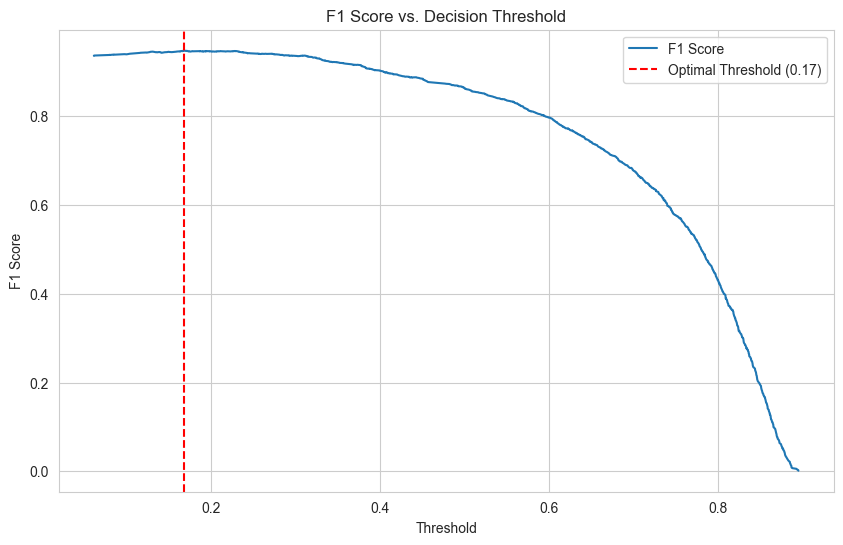

In [34]:
y_proba_final = final_ensemble_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_final)
f1_scores = (2 * precision * recall) / (precision + recall)
optimal_idx = np.nanargmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Default F1-score (threshold=0.5): {f1_score(y_test, y_proba_final > 0.5):.4f}")
print(f"Optimal F1-score: {f1_scores[optimal_idx]:.4f}")
print(f"Optimal Threshold: {optimal_threshold:.4f}")
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.title('F1 Score vs. Decision Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

## 14. Final Evaluation & Business Metrics

--- Final Performance on Unseen Test Data (with Optimal Threshold) ---
              precision    recall  f1-score   support

           0     0.7568    0.2917    0.4211       192
           1     0.9099    0.9871    0.9469      1392

    accuracy                         0.9028      1584
   macro avg     0.8333    0.6394    0.6840      1584
weighted avg     0.8914    0.9028    0.8832      1584



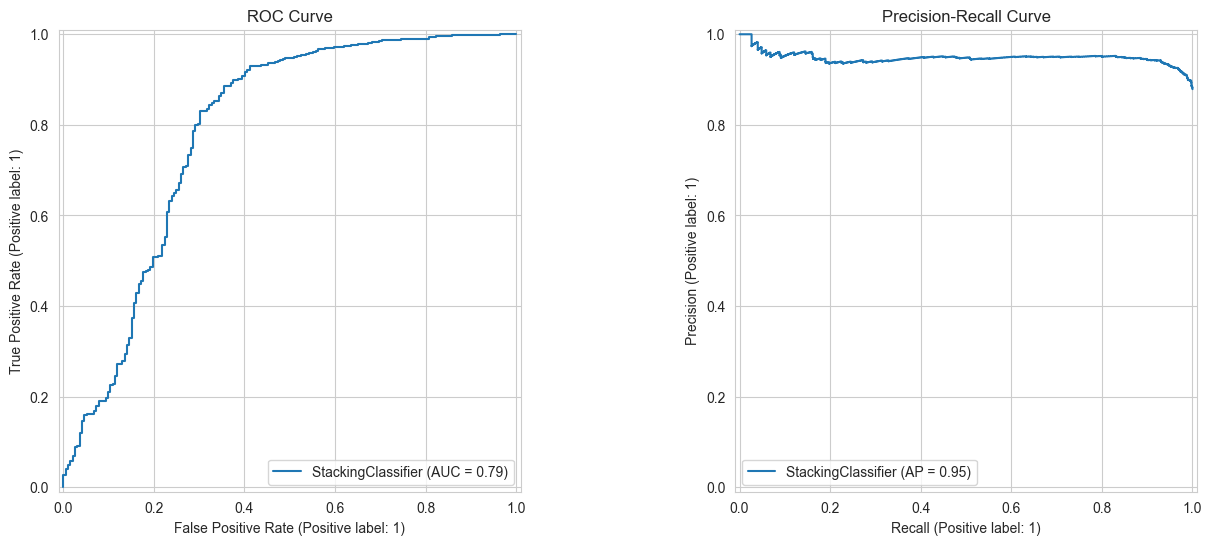


--- Business Metrics ---
Model-driven CPA on Test Set: $5897.59


In [35]:
print("--- Final Performance on Unseen Test Data (with Optimal Threshold) ---")
y_pred_optimal = (y_proba_final >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_optimal, digits=4))
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
RocCurveDisplay.from_estimator(final_ensemble_model, X_test, y_test, ax=ax[0])
PrecisionRecallDisplay.from_estimator(final_ensemble_model, X_test, y_test, ax=ax[1])
ax[0].set_title('ROC Curve')
ax[1].set_title('Precision-Recall Curve')
plt.show()
print("\n--- Business Metrics ---")
X_test_original = df_clean.loc[X_test.index]
total_spend = X_test_original['AdSpend'].sum()
total_conversions = y_test[y_pred_optimal == 1].sum()
cpa = total_spend / total_conversions if total_conversions > 0 else float('inf')
print(f"Model-driven CPA on Test Set: ${cpa:.2f}")

## 15. Combined SHAP Importance for the Full Ensemble

--- Combined SHAP Feature Importance for the Full Ensemble ---

--- Analyzing Base Model: CATBOOST ---
...Using TreeExplainer.
✅ Successfully calculated importances for CATBOOST.

--- Analyzing Base Model: ADABOOST ---
...Using KernelExplainer.


  0%|          | 0/6336 [00:00<?, ?it/s]

⚠️ Could not explain model adaboost. Error: Data must be 1-dimensional, got ndarray of shape (15, 2) instead

--- Analyzing Base Model: RANDOM_FOREST ---
...Using TreeExplainer.
⚠️ Could not explain model random_forest. Error: Data must be 1-dimensional, got ndarray of shape (15, 2) instead


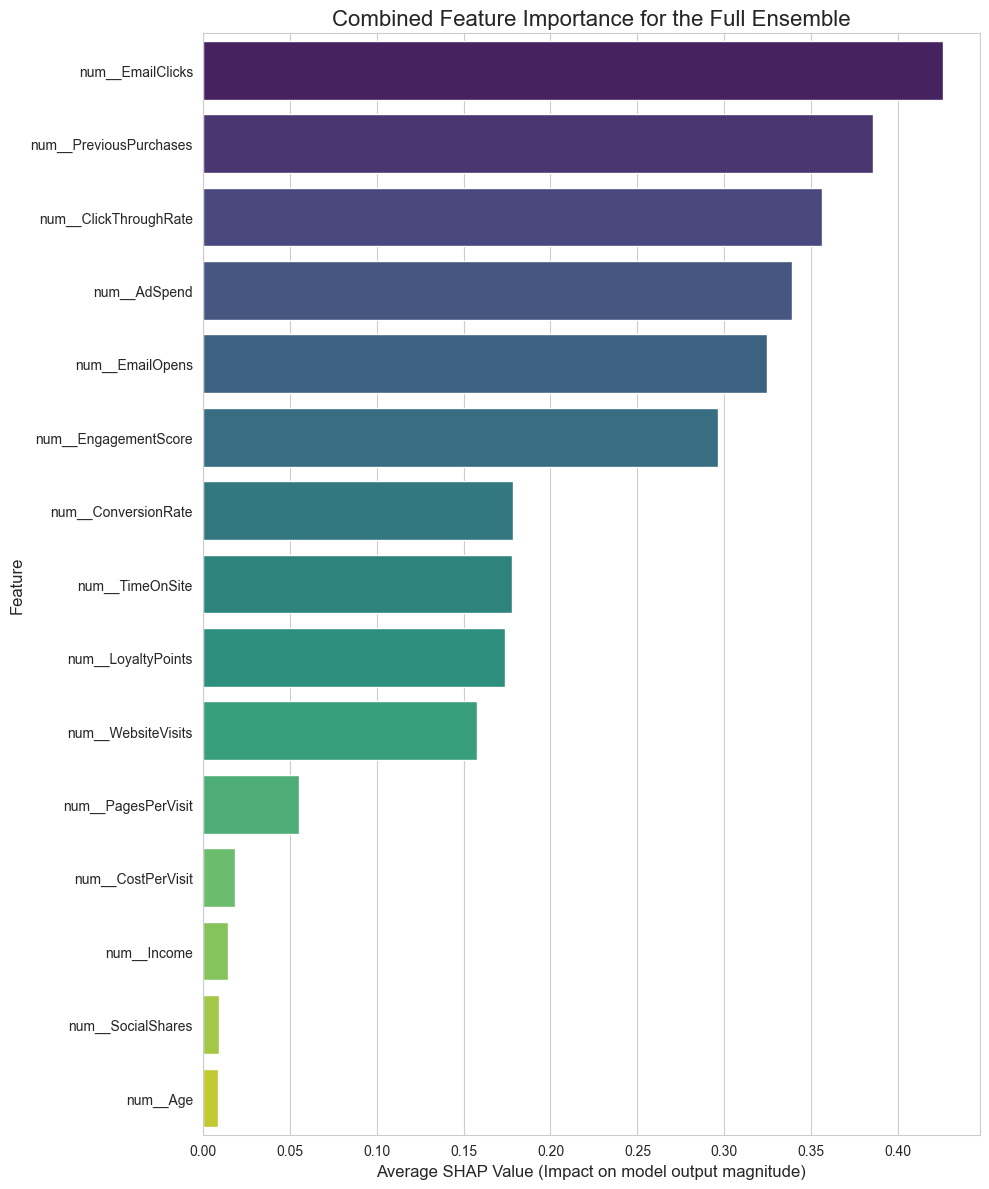

In [36]:
print("--- Combined SHAP Feature Importance for the Full Ensemble ---")
all_feature_importances = []
for model_name, model_pipeline in final_ensemble_model.named_estimators_.items():
    print(f"\n--- Analyzing Base Model: {model_name.upper()} ---")
    is_explainable = True
    shap_values, feature_names, X_transformed = None, None, None
    try:
        if hasattr(model_pipeline, '_final_estimator'): # It's a pipeline
            classifier = model_pipeline.named_steps['classifier']
            preprocessor = model_pipeline.named_steps['preprocessor']
            X_transformed_arr = preprocessor.fit_transform(X_train, y_train)
            feature_names = preprocessor.get_feature_names_out()
            X_transformed = pd.DataFrame(X_transformed_arr, columns=feature_names)
            model_type_str = str(type(classifier)).lower()
            if 'tree' in model_type_str or any(name in model_type_str for name in ['xgb', 'lgbm', 'catboost', 'forest']):
                print('...Using TreeExplainer.')
                explainer = shap.TreeExplainer(classifier)
                shap_values = explainer.shap_values(X_transformed)
            else:
                print('...Using KernelExplainer.')
                X_sample = shap.sample(X_transformed, 100)
                explainer = shap.KernelExplainer(classifier.predict_proba, X_sample)
                shap_values = explainer.shap_values(X_transformed, nsamples=50)
        else: # It's a Keras wrapper or a pre-fitted model
            classifier = model_pipeline
            X_transformed_dict = classifier._prepare_data(X_train)
            background = {k: v[:100] for k, v in X_transformed_dict.items()}
            input_tensors = [tf.convert_to_tensor(v) for v in X_transformed_dict.values()]
            feature_names = X_train.columns.tolist()
            X_transformed = X_train # For context
            print('...Using DeepExplainer.')
            explainer = shap.DeepExplainer(classifier.model, background)
            shap_values = explainer.shap_values(input_tensors)[0]
        
        if is_explainable and shap_values is not None:
            if isinstance(shap_values, list): shap_values = shap_values[1]
            mean_abs_shap = np.abs(shap_values).mean(axis=0)
            all_feature_importances.append(pd.Series(mean_abs_shap, index=feature_names))
            print(f"✅ Successfully calculated importances for {model_name.upper()}.")
    except Exception as e:
        print(f"⚠️ Could not explain model {model_name}. Error: {e}")
if all_feature_importances:
    combined_importance_df = pd.concat(all_feature_importances, axis=1).fillna(0)
    mean_importance = combined_importance_df.mean(axis=1)
    plot_df = pd.DataFrame({'Feature': mean_importance.index, 'Mean Abs SHAP Value': mean_importance.values})
    plot_df = plot_df.sort_values(by='Mean Abs SHAP Value', ascending=False).head(20)
    plt.figure(figsize=(10, 12))
    sns.barplot(x='Mean Abs SHAP Value', y='Feature', data=plot_df, palette='viridis')
    plt.title('Combined Feature Importance for the Full Ensemble', fontsize=16)
    plt.xlabel('Average SHAP Value (Impact on model output magnitude)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ No models in the ensemble were explainable.")

## 16. Deployment Readiness

In [37]:
model_filename = 'final_submission_model.pkl'
joblib.dump(final_ensemble_model, model_filename)
print(f"💾 Final model saved to '{model_filename}'")
def predict_conversion(new_data, model_path, optimal_threshold):
    model = joblib.load(model_path)
    if isinstance(new_data, dict):
        new_data = pd.DataFrame([new_data], columns=X_train.columns)
    for col in X_train.columns:
        if col not in new_data.columns:
            new_data[col] = 0
    new_data = new_data[X_train.columns]
    probabilities = model.predict_proba(new_data)[:, 1]
    predictions = (probabilities >= optimal_threshold).astype(int)
    return predictions, probabilities
example_customer = X_test.iloc[[0]]
pred, prob = predict_conversion(example_customer, model_filename, optimal_threshold)
print(f"\nExample prediction for a single customer:")
print(f"  Predicted Conversion (0=No, 1=Yes): {pred[0]}")
print(f"  Predicted Conversion Probability: {prob[0]:.4f}")

💾 Final model saved to 'final_submission_model.pkl'

Example prediction for a single customer:
  Predicted Conversion (0=No, 1=Yes): 1
  Predicted Conversion Probability: 0.8264


## 17. Conclusion